In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string

data = pd.read_csv("C:\\Users\\fongj\\Downloads\\BT4012\\BT4012_Reviews\\Data\\Raw\\Sampled Yelp Review Data.csv")

In [34]:
data.head()

,Unnamed: 0,date,reviewID,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,restaurantID
0,670716,7/9/2010,9Nn0xmhNMD9W8W1z-UknIQ,0G-QF457q_0Z_jKqh6xWiA,I love sitting outside at the caf茅s that line ...,4,2,2,3,NR,8ljZdIJ-6j4PjR1EjzId7g
1,168448,5/23/2012,vbmplvJr4nZ1zKqGz6MebQ,AfIkqpTCtF28M2zNAj5rSA,"I live a block away from this place, and I dec...",4,0,0,0,NR,1p82vLo47SsW3aYZbxHipw
2,245044,2/27/2011,f17Q7D29xkJ_BQpIWcP2xg,pu_Aw_LpqAgUyaZkiY8HyA,The bbq pork sandwich is one of my great Rhode...,5,0,0,0,NR,5cdoxMpGrrwsoTTHYB1TIg
3,132348,4/21/2012,6Ie3C_G3-_Kc9izOPyznGA,axRg9Gsbq5-JznPkSGYlUQ,Definitely a gastronomic adventure and a uniqu...,5,0,2,0,NR,GJu1NAoV8VtoCdiw0mKKwQ
4,485478,1/27/2009,NLEzoWC2wHEIv7_c5uWdyQ,BfBC_x7SL7K2THafF6IM2w,What can I add that the 277 people before me d...,5,2,3,1,YR,u4ZOxRTE-9N9i-7iR8A4ig


Length of each review (how many words and characters in each review)

In [35]:
# Handle NaN values in the 'reviewContent' column (replace with an empty string)
data['reviewContent'].fillna('', inplace=True)

# Calculate word and character counts for each review
data['word_count'] = data['reviewContent'].apply(lambda x: len(str(x).split()))
data['char_count'] = data['reviewContent'].apply(lambda x: len(str(x)))

# Summary statistics for word counts and character counts
word_count_stats = data['word_count'].describe()
char_count_stats = data['char_count'].describe()

print("Word Count Statistics:")
print(word_count_stats)

print("\nCharacter Count Statistics:")
print(char_count_stats)

Word Count Statistics:
count    100000.000000
mean        137.807160
std         115.994096
min           0.000000
25%          60.000000
50%         107.000000
75%         180.000000
max        1021.000000
Name: word_count, dtype: float64

Character Count Statistics:
count    100000.000000
mean        746.658710
std         630.565057
min           0.000000
25%         324.000000
50%         575.000000
75%         976.000000
max        4998.000000
Name: char_count, dtype: float64


Word cloud

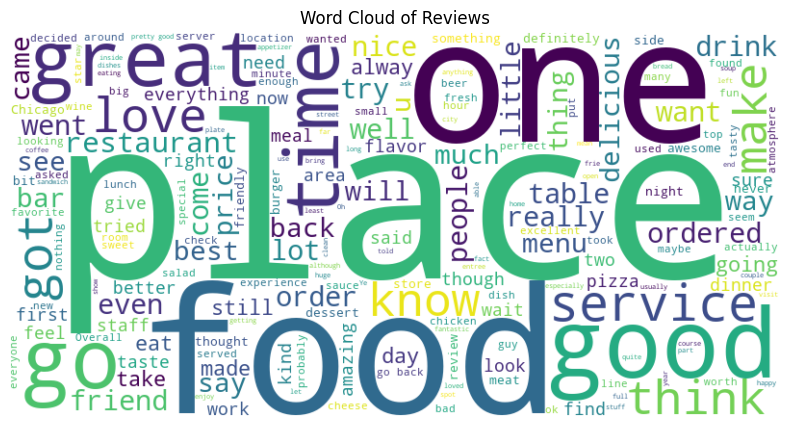

In [36]:
from wordcloud import WordCloud
text = " ".join(review for review in data['reviewContent'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

remove stopwords(unimportant words like "i", "the", "a", "in") tokenisation and sentiment analysis

In [42]:
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob

# Tokenization
tokenizer = WordPunctTokenizer()
data['tokens'] = data['reviewContent'].apply(tokenizer.tokenize)

# Define a function to remove stopwords and punctuation
def preprocess_text(tokens):
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens]  # Convert to lowercase
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [word for word in tokens if word not in string.punctuation]  # Remove punctuation
    tokens = [word for word in tokens if len(word) > 1]  # Remove single-character words
    return tokens

# Apply preprocessing to the 'tokens' column
data['clean_tokens'] = data['tokens'].apply(preprocess_text)

# Join the clean tokens back into sentences
data['clean_text'] = data['clean_tokens'].apply(lambda x: ' '.join(x))

# Sentiment Analysis using TextBlob
data['sentiment'] = data['clean_text'].apply(lambda x: TextBlob(x).sentiment)

# Extract polarity and subjectivity scores from the sentiment analysis
data['polarity'] = data['sentiment'].apply(lambda x: x.polarity)
data['subjectivity'] = data['sentiment'].apply(lambda x: x.subjectivity)

Polarity: numerical score that quantifies the sentiment of the text on a continuous scale. It measures how positive or negative the text is. Polarity scores typically range from -1 (extremely negative) to 1 (extremely positive), with 0 indicating neutral sentiment.

Subjectivity: Subjectivity measures the degree to which the text is subjective or opinion-based rather than objective. Subjectivity is also represented as a numerical score ranging from 0 to 1. A score closer to 0 suggests that the text is more objective, factual, or informational. A score closer to 1 suggests that the text is more subjective and opinion-based.

In [44]:
# Print the first few rows of the DataFrame to see the results
print(data[['tokens','sentiment', 'polarity', 'subjectivity']].head())

                                              tokens  \
0  [I, love, sitting, outside, at, the, caf茅s, th...   
1  [I, live, a, block, away, from, this, place, ,...   
2  [The, bbq, pork, sandwich, is, one, of, my, gr...   
3  [Definitely, a, gastronomic, adventure, and, a...   
4  [What, can, I, add, that, the, 277, people, be...   

                                   sentiment  polarity  subjectivity  
0  (0.25070672081541645, 0.5030896639592293)  0.250707      0.503090  
1  (0.18474517906336088, 0.5696969696969697)  0.184745      0.569697  
2   (0.4000000000000001, 0.8833333333333333)  0.400000      0.883333  
3  (0.09523148148148147, 0.4720634920634919)  0.095231      0.472063  
4  (0.20257591442374048, 0.4480998389694043)  0.202576      0.448100  


N-grams analysis

In [43]:
from nltk.util import ngrams
from collections import Counter
# Define the n-gram range (e.g., 2 for bigrams)
ngram_range = 2  # For bigrams (adjust as needed)

# Function to extract n-grams from a list of tokens
def extract_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Extract n-grams and store them in a new column
data['ngrams'] = data['clean_tokens'].apply(lambda x: extract_ngrams(x, ngram_range))

# Flatten the list of n-grams
all_ngrams = [ngram for ngram_list in data['ngrams'] for ngram in ngram_list]

# Count the frequency of each n-gram
ngram_freq = Counter(all_ngrams)

# Print the most common n-grams and their frequencies
most_common_ngrams = ngram_freq.most_common(10)
for ngram, freq in most_common_ngrams:
    print(f"N-gram: {' '.join(ngram)} - Frequency: {freq}")

N-gram: go back - Frequency: 5153
N-gram: pretty good - Frequency: 4826
N-gram: really good - Frequency: 4177
N-gram: ice cream - Frequency: 3564
N-gram: come back - Frequency: 3360
N-gram: first time - Frequency: 3202
N-gram: next time - Frequency: 3043
N-gram: even though - Frequency: 2890
N-gram: great place - Frequency: 2800
N-gram: food good - Frequency: 2676


Topic modelling

In [47]:
from gensim import corpora

# Create a dictionary from your tokenized text data
dictionary = corpora.Dictionary(data['clean_tokens'])

# Create a bag-of-words (BoW) corpus
corpus = [dictionary.doc2bow(text) for text in data['clean_tokens']]

from gensim.models import LdaModel

# Train an LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics and their top keywords
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

# Assign topics to documents
topics_in_documents = [lda_model[doc] for doc in corpus]

(0, '0.021*"place" + 0.020*"food" + 0.018*"good" + 0.016*"great" + 0.011*"service" + 0.010*"bar" + 0.009*"really" + 0.008*"go" + 0.007*"night" + 0.007*"like"')
(1, '0.017*"good" + 0.017*"food" + 0.011*"place" + 0.011*"chicken" + 0.010*"like" + 0.008*"..." + 0.007*"really" + 0.006*"get" + 0.006*".." + 0.006*"rice"')
(2, '0.010*"time" + 0.010*"us" + 0.009*"would" + 0.008*"back" + 0.008*"one" + 0.008*"get" + 0.007*"..." + 0.006*"got" + 0.006*"even" + 0.006*"said"')
(3, '0.008*"like" + 0.007*"place" + 0.007*"one" + 0.007*"get" + 0.006*"great" + 0.005*"store" + 0.005*"also" + 0.004*"..." + 0.004*"find" + 0.004*"love"')
(4, '0.011*"pizza" + 0.009*"cheese" + 0.008*"good" + 0.007*"bread" + 0.006*"salad" + 0.006*"cream" + 0.006*"delicious" + 0.006*"chocolate" + 0.006*"like" + 0.006*"dish"')
